Python/MATLAB for Physics

Adam Watts

In [104]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

<img src="HW_1_1.png" width=600px />

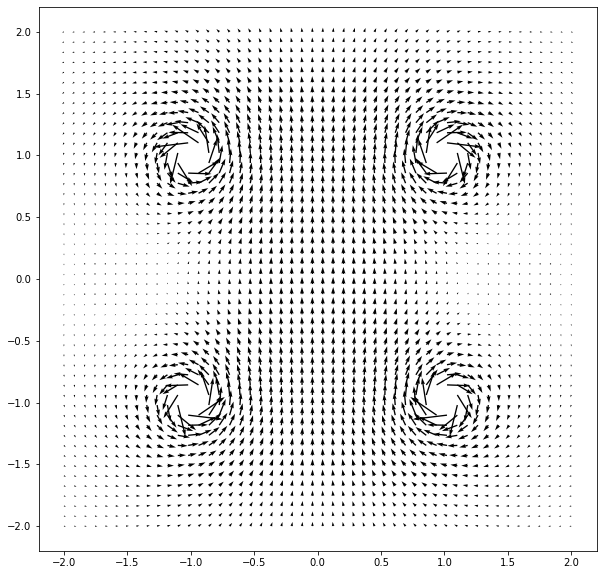

In [105]:
# Set up basic initial parameters
xlim = (-2, 2)
ylim = (-2, 2)
ngridpoints = 50
x = np.linspace(xlim[0], xlim[1], ngridpoints)
y = np.linspace(ylim[0], ylim[1], ngridpoints)
X, Y = np.meshgrid(x, y)

# Choose wire locations in the above grid space
wire1 = (-1, 1) # current out of page
wire2 = (1, 1) # current into page
wire3 = (-1, -1) # current out of page
wire4 = (1, -1) # current into page

# Don't plot fields that are higher than threshold, to avoid singularities
B_max = 10.0

# Define a function that computes the field components for a wire
# depending on its position
def compute_field(X, Y, wire_position, B_max):
    x0 = wire_position[0]
    y0 = wire_position[1]
    Bx = (Y - y0) / ((X - x0)**2 + (Y - y0)**2)
    By = -1*(X - x0) / ((X - x0)**2 + (Y - y0)**2)

    # Apply Bmax threshold to avoid plotting singularities
    # Set elements above threshold to NaN
    B_tot = np.sqrt(Bx**2 + By**2)
    Bx[np.where(B_tot > B_max)] = np.nan
    By[np.where(B_tot > B_max)] = np.nan

    return Bx, By

# Use the function to compute the field components for each wire individually
Bx1, By1 = compute_field(X, Y, wire1, B_max)
Bx2, By2 = compute_field(X, Y, wire2, B_max)
Bx3, By3 = compute_field(X, Y, wire3, B_max)
Bx4, By4 = compute_field(X, Y, wire4, B_max)

# Add all wire fields together
Bx_total = -1*Bx1 + Bx2 - Bx3 + Bx4
By_total = -1*By1 + By2 - By3 + By4

# Plot the fields in the x-y plane

plt.figure(figsize=(10,10))
plt.quiver(X, Y, Bx_total, By_total)


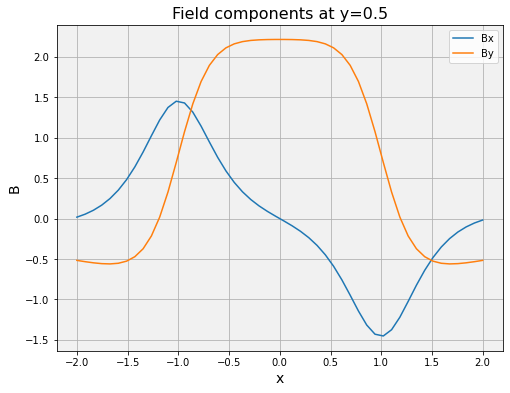

In [106]:
# Plot Bx and By @ y = 0.5
yoffset = 0.5
Bx_line1, By_line1 = compute_field(x, yoffset, wire1, B_max)
Bx_line2, By_line2 = compute_field(x, yoffset, wire2, B_max)
Bx_line3, By_line3 = compute_field(x, yoffset, wire3, B_max)
Bx_line4, By_line4 = compute_field(x, yoffset, wire4, B_max)

Bx_line_total = -1*Bx_line1 + Bx_line2 - Bx_line3 + Bx_line4
By_line_total = -1*By_line1 + By_line2 - By_line3 + By_line4

plt.figure(figsize=(8,6))
plt.title('Field components at y=0.5', fontsize=16)
plt.plot(x, Bx_line_total, label='Bx')
plt.plot(x, By_line_total, label='By')
plt.xlabel('x', fontsize=14)
plt.ylabel('B', fontsize=14)
plt.legend()
plt.grid()
plt.gca().set_facecolor('#F1F1F1')


---

<img src="HW_1_2.png" width = 600px />

In [107]:
nparticles = 10000
mean = 0.0
sigma = 1.0

X = np.random.normal(mean, sigma, nparticles)
Y = np.random.normal(mean, sigma, nparticles)
Px = np.random.normal(mean, sigma, nparticles)
Py = np.random.normal(mean, sigma, nparticles)

def truncate(x, p, sigma):
    outlier_indices = np.asarray([0])
    niter = 0

    while outlier_indices.size != 0:
        niter = niter + 1
        print(niter)
        outlier_indices = np.where((x**2 + p**2)**0.5 > 3*sigma)[0]
        x = np.delete(x, outlier_indices)
        p = np.delete(p, outlier_indices)

        # Generate new random values to replace what we deleted
        new_x = np.random.normal(mean, sigma, outlier_indices.size)
        x = np.hstack((x, new_x))
        new_p = np.random.normal(mean, sigma, outlier_indices.size)
        p = np.hstack((p, new_p))

    return x, p

X, Px = truncate(X, Px, sigma)
Y, Py = truncate(Y, Py, sigma)


1
2
3
1
2


In [108]:
print('<x> = %.2f, x_min = %.2f, x_max = %.2f'%(np.abs(np.mean(X)), np.min(X), np.max(X)))

<x> = 0.01, x_min = -2.96, x_max = 2.98


60.0


Text(0, 0.5, 'Y')

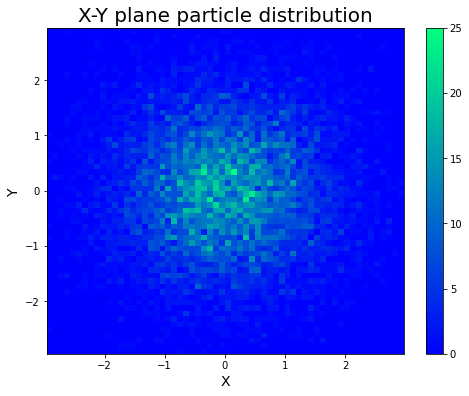

In [109]:
# Plot 2D X and Y histogram
lims = (-3, 3)
bin_width = 0.1
nbins = np.round((lims[1] - lims[0])/bin_width)
print(nbins)
plt.figure(figsize=(8,6))
plt.title('X-Y plane particle distribution', fontsize=20)
plt.hist2d(X, Y, bins=int(nbins), cmap='winter')
plt.colorbar()
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)

---

<img src="HW_1_3.png" width = 600px />

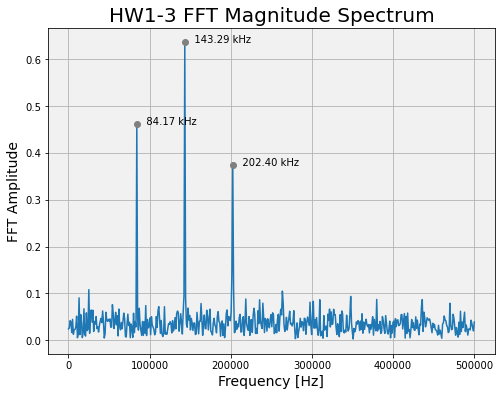

In [110]:
# Read in the data file
import csv
from scipy.signal import find_peaks

with open('HW_data') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    for row in csv_reader:
        if len(row) > 0:
            x = np.array(row).astype(float)

# Compute FFT of x array
fx = np.fft.fft(x)

# Take magnitude, i.e. quadrature sum of Re{x} and Im{x}
fx = np.abs(fx)   

# The magnitude data is mirrored, so just use first half
fx = fx[0:int(len(x)/2)]

# Normalize to number of data points
fx = fx/len(fx)

# Set time scale parameters
tstep = 1E-6 # [s]
tmax = len(fx)*tstep

# Generate time array based on the above time scale parameters
t = np.linspace(0,tmax,len(fx))

# Convert the time array to a frequency array
freq = t/(2*tmax*tstep)

# Find the frequencies correcponding to peaks in the spectra
peaks, _ = find_peaks(fx, height=0.2)

# Plot the frequency spectrum
plt.figure(figsize=(8,6))
plt.title('HW1-3 FFT Magnitude Spectrum', fontsize=20)
plt.plot(freq, fx)
plt.plot(freq[peaks], fx[peaks], "o", color='grey')
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('FFT Amplitude', fontsize=14)
plt.grid()
plt.gca().set_facecolor('#F1F1F1')

# Add some text on the plot annotating the peaks
for i in range(len(peaks)):
    plt.text(freq[peaks[i]], fx[peaks[i]], '   %.2f kHz'%(1.0E-3*freq[peaks[i]]))

In [111]:
'''
The carrier frequency fc will be the frequency associated with highest peak. The next highest peak will be at fc +/- fm . 
So the modulation frequency will be found by the difference between the two (in frequency)
'''

f_carrier = freq[peaks[1]]
print('Carrier frequency is %.2f kHz'%(1E-3*f_carrier))

f_modulation = freq[peaks[-1]] - f_carrier
print('Modulation frequency is %.2f kHz'%(1.0E-3*f_modulation))

Carrier frequency is 143.29 kHz
Modulation frequency is 59.12 kHz
